# ДЗ 1, часть 1. Метод максимального правдоподобия

Имя, Фамилия: *Тань Сипэн*

группа: *223*

**Оценка(для проверяющего):** 0 из 10

**Дедлайн:** одновременно с частью 3

In [7]:
#all imports here please
import pickle as pkl

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#... add your own if necessary

## Задача 1. Свойства ММП оценок для модели нормального распределения

Рассмотрим следующую модель из независимых векторных наблюдений $X_1,..,X_n$:

$$X_i \overset{iid}{\sim} \mathcal{N}(\mu, \Sigma).$$

Постройте и исследуйте оценку для вектора матожиданий $\mu$ и ковариационной матрицы $\Sigma$ методом максимального правдоподобия.

**В помощь:** Если дифференцировать функцию $f: \mathbb{R}^{m \times n} \to \mathbb{R}$ по ячейкам входной матрицы, то получится матрица из производных, обозначаемая $\nabla_A f(A)$. Условие первого порядка для оптимизации записывается так же, как и в привычных вам случаях, нужно приравнять производные к нулю. Можете использовать [таблицу](https://en.wikipedia.org/wiki/Matrix_calculus#Scalar-by-matrix_identities) для получения оценок.

### Правдоподобие

*Запишите функцию правдоподобия и ее логарифм.*

$$ 
\ln L(\theta)
= \ln \prod_{i=1}^n \frac{1}{\sqrt{2\pi}} \cdot \frac{1}{\sqrt{det\Sigma}} \cdot e^{-\frac{1}{2} \langle \Sigma^{-1} (X_i - \mu), X_i - \mu \rangle}
= \ln C \prod_{i=1}^n \frac{1}{\sqrt{2\pi}} \cdot \frac{1}{\sqrt{det\Sigma}} \cdot e^{-\frac{1}{2} \langle \Sigma^{-1} (X_i - \mu), X_i - \mu \rangle}
= \sum_{i=1}^n [-\frac{1}{2} \ln det\Sigma -\frac{1}{2} \langle \Sigma^{-1} (X_i - \mu), X_i - \mu \rangle] + C
= -\frac{1}{2} \sum_{i=1}^n [\ln det\Sigma + \langle \Sigma^{-1} (X_i - \mu), X_i - \mu \rangle] + C
$$

### ММП-оценка

*Найдите выражение для ММП-оценки и сравните решение с решением в одномерном случае.*

$$
\frac{\partial}{\partial \Sigma}[\ln det\Sigma + \langle \Sigma^{-1}(X_i - \mu), X_i - \mu \rangle]
= \Sigma^{-1} + \frac{\partial}{\partial \Sigma}[(X_i - \mu)^{T} \Sigma^{-1} (X_i - \mu)]
= \Sigma^{-1} - \Sigma^{-1} (X_i - \mu)(X_i - \mu)^{T} \Sigma^{-1} = 0
$$

$$
\Longrightarrow \hat{\mu} = \bar{X}
$$

$$
\frac{\partial}{\partial \mu}[\ln det\Sigma + \langle \Sigma^{-1}(X_i - \mu), X_i - \mu \rangle]
= \frac{\partial}{\partial \mu}[(X_i - \mu)^{T} \Sigma^{-1} (X_i - \mu)]
= \frac{\partial}{\partial \mu}[X_i^{T}\Sigma^{-1}X_i - X_i^{T}\Sigma^{-1}\mu - \mu^{T} \Sigma^{-1} X_i + \mu^{T}\Sigma^{-1}\mu]
= 2\Sigma^{-1} (\mu - X_i)
$$

$$
\Longrightarrow \hat{\Sigma} = \frac{\sum_{i=1}^n(X_i - \mu)(X_i - \mu)^{T}}{n}
$$

## Задача 2. Свойства ММП оценок для модели равномерного распределения

Рассмотрим модель выборки $X_1,..,X_n$ из наблюдений

$X_i \overset{iid}{\sim} U[0,a]$

### Правдоподобие

*Запишите функцию правдоподобия и ее логарифм.*

$$
\ln L(\theta)
= \ln \prod_{i=1}^n \mathbf{I}(x_i \in [0; a])
= -n \ln a \cdot \mathbf{I}(x_i \in [0; a]), 0 \leqslant X_1 \leqslant X_n \leqslant a
$$

### ММП-оценка параметра $a$

*Найдите выражение для ММП-оценки параметра $a$*.

Минимизируем параметр a
$$
\Longrightarrow \hat{a} = X_n
$$

## Задача 3. Оцениваем модель охлаждения (3 балла)

[(Другой) закон Ньютона](https://en.wikipedia.org/wiki/Newton%27s_law_of_cooling)  -- простая математическая модель охлаждения(или нагревания) тела

$$
\frac{dT}{dt} = r (T_{env} - T(t)),
$$

это дифференциальное уравнение первого порядка, которое в непрерывном (то есть, в любой момент $t$) показывает, какая должна быть температура у тела, если дана начальная температура $T(0)=T_0$. Температурные единицы измерения -- Кельвины, $r$ -- это некоторая константа, зависящая от самого тела, от состава среды и т.п. . Это приближённый закон.

Вообще константа $r$ неизвестна априори и если мы хотим делать какое-то устройство, которое использует такую модель, мы должны как-то оценить $r$. Один из вариантов -- померить температуру среды (полагаем её константной), нагреть тело до какой-то температуры $T_0$, а потом оставить остывать и замерять через разные промежутки времени его температуру. По итогам таких наблюдений получится датасет
$$
T_{t_0},T_{t_1},..,T_{t_n}, ~~ t_0=0.
$$

Осталось придумать вероятностную модель. Например, мы можем записать приближённое дискретизированное по времени уравнение, используя метод Эйлера:

$$
T_{t_{i+1}} = T_{t_{i}} + r (T_{env} - T_{t_{i}}) \Delta t_i, ~~  \Delta t_i = t_{i+1} - t_i,
$$

а дальше предлагать разные варианты оценивания.

### Правдоподобие

С учётом ошибок измерений и необъяснимых факторов среды, договорившись измерять температуру через равные промежутки времени $\Delta t_i= \Delta t$, можно предположить модель, очень похожую на модель авторегрессии $AR(1)$:

$$
T_{i+1} = (1 - r\Delta t)T_{i} + r T_{env} \Delta t + \varepsilon_{i+1}, ~~ \varepsilon_{i+1} \sim_{iid} N(0,\sigma^2).
$$

1. Предполагая $T_{env}$ и $\Delta t$ данными, определите параметры модели, которые нужно оценивать и выведите функцию лог-правдоподобия.

2. Выведите оценки ММП для данной модели.

Модель AR(1): $X_t = C + \phi X_{t-1} + \epsilon_t \Longrightarrow T_{i+1} = rT_{env}\Delta t + (1 - r\Delta t)T_i + \epsilon_{i+1}$

$$$$
Правдоподобие: 

$$\epsilon_{i+1} = T_{i+1} - rT_{env}\Delta t - (1 - r\Delta t)T_i ~~ \sim_{iid} N(0,\sigma^2)$$

$$
\Longrightarrow \ln L
= \ln \prod_{i=0}^{n-1} \frac{1}{\sqrt{2\pi \sigma^{2}}} \exp{(- \frac{[T_{i+1} - rT_{env}\Delta t - (1 - r\Delta t)T_i ]^2}{2\sigma^2})}
= - \frac{n}{2} \ln 2\pi\sigma^2 - \frac{1}{2\sigma^2} \sum_{i=0}^{n-1}[T_{i+1} - rT_{env}\Delta t - (1 - r\Delta t)T_i]^2
$$

$$$$
Дифференцируем по $\sigma^2$:

$$
\frac{\partial}{\partial \sigma^2} \ln L
= - \frac{n}{2\sigma^2} + \frac{1}{2\sigma^4} \sum_{i=0}^{n-1} [T_{i+1} - rT_{env}\Delta t - (1 - r\Delta t)T_i]^2 = 0
$$

$$
\Longrightarrow \hat{\sigma}^2 = \frac{1}{n} \sum_{i=0}^{n-1}[T_{i+1} - rT_{env}\Delta t - (1 - r\Delta t)T_i]^2
$$

$$$$
Дифференцируем по $r$:

$$
\frac{\partial}{\partial r} \ln L
= \frac{\partial}{\partial r}[- \frac{1}{2\sigma^2} \sum_{i=0}^{n-1}(T_{i+1} - rT_{env}\Delta t - (1 - r\Delta t)T_i)^2
= \frac{\partial}{\partial r}[- \frac{1}{2\sigma^2} \sum_{i=0}^{n-1}[(T_{i+1} - T_i)^2 + 2r\Delta t(T_i - Tenv)(T_{i+1} - T_i) + r^2 \Delta t^2 (T_i - Tenv)^2]
= -\frac{1}{2\sigma^2} \sum_{i=0}^{n-1} (2\Delta t(T_i - Tenv)(T_{i+1} - T_i) + 2r \Delta t^2 (T_i - Tenv)^2) = 0
$$


$$
\Longrightarrow  \hat{r} = \frac{\sum_{i=0}^{n-1} (T_i - Tenv)(T_{i+1} - T_i)}{\sum_{i=0}^{n-1}\Delta t(T_i - Tenv)^2}
$$

### Пишем модель

Имплементируйте класс модели, используя шаблон ниже и проведите некоторые тесты, чтобы убедиться, что он рабочий.

In [71]:
class CoolingModel:
    
    def __init__(self, r, delta, sigma2):
        self.r = r
        self.sigma2 = sigma2
        self.delta = delta
        
    def step(self,T0,Tenv):
        """Makes one step in time

        Args:
            T0 (float[]): current temperature (NTraj,)
            Tenv (float[]): current environment temperature (NTraj,)
        Returns:
            T (float[]): next temperature (NTraj,)
        """ 
        T_next = self.r * Tenv * self.delta + (1 - self.r * self.delta) * T0
        noise_list = []
        for i in range(NTrajs):
            noise = np.random.normal(0, self.sigma2)
            noise_list.append(noise)
        noise_list = np.array(noise_list)
        return T_next + noise_list
        #raise NotImplementedError
    
    def simulate(self, T0, NSteps, Tenv):
        """Simulates NTraj trajectories of cooling process

        Args:
            T0 (float[]): initial temperature (NTraj,)
            NSteps (int): number of time steps
            Tenv (float): environment temperature
        Returns:
            trajs (float[]): simulation result (NTraj,NSteps)
        """        
        Tenv = np.ones_like(T0)*Tenv
        trajs = np.zeros([T0.shape[0],NSteps+1])
        trajs[:,0] = T0
        #YOUR CODE? use self.step
        # trajs = ....s
        for i in range(NSteps):
            trajs[:, i + 1] = self.step(trajs[:, i], Tenv)
        return trajs       

    def fit(self, temps, Tenv):
        """Fits the model using the given data

        Args:
            temps (float[]): temperatures (N,)
            Tenv (float): environment temperature
        """        
        #write here your MLE estimate (see the task below)
        sigma2_mle = 0
        for i in range(1, len(temps)):
            sigma2_mle += (temps[i] - (1 - self.r * self.delta) * temps[i - 1] - self.r * Tenv * delta) ** 2
        self.sigma2 = sigma2_mle / len(temps)
        
        up = 0
        down = 0
        for i in range(1, len(temps)):
            up += (temps[i - 1] - Tenv) * (temps[i] - temps[i - 1])
            down += (temps[i - 1] - Tenv) ** 2
        self.r = up / down
        self.r /= self.delta
        self.r *= - 1


Попробуйте для нарисовать несколько возможных траекторий, код ниже должен показать график.

In [78]:
#params
r = 0.2 #1/sec
sigma2=0.02

#time stuff
NSteps = 2000
finalTime = 20
delta=finalTime/NSteps #sec

#number of simulations
NTrajs = 5

#temperatures
T0 = np.ones([NTrajs])*280 #K
Tenv = 300 #K

procModel = CoolingModel(r,delta,sigma2)
trajs = procModel.simulate(T0,NSteps,Tenv)

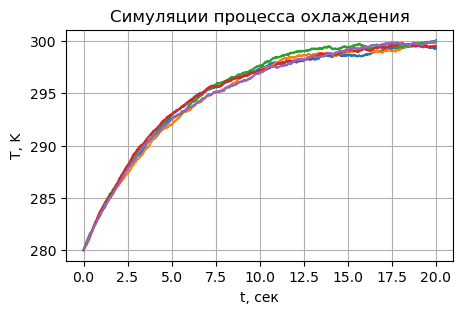

In [79]:
ts = np.arange(0,finalTime+delta/2,delta) #+delta/2 to include the last value

f, ax = plt.subplots(figsize=(5,3))

ax.grid()
ax.set_title("Симуляции процесса охлаждения")
ax.set_xlabel("t, сек")
ax.set_ylabel("T, K")
ax.plot(ts,trajs.T)
plt.show()

Видимо температура окружения выше

### Оценка модели по данным

Допишите метод `fit` в класс модели и оцените параметры, используя данный датасет, с помощью метода максимального правдоподобия.

In [80]:
with open("/Users/tanpeter/Desktop/Applied Statistics in ML/ASML_Homework/HW1/coolingModel.pkl","rb") as f:
    dd = pkl.load(f)
    mle_model = CoolingModel(0, dd['delta'], 0)
    mle_model.fit(dd['temperature'], dd['Tenv'])
    print(mle_model.r, mle_model.sigma2)
    print(dd)

0.036087933008328 0.0156414062562464
{'time': array([0.00000e+00, 1.25000e-02, 2.50000e-02, ..., 1.49750e+01,
       1.49875e+01, 1.50000e+01]), 'temperature': array([320.        , 320.05628424, 320.09016537, ..., 295.97553699,
       296.05465504, 296.06736498]), 'Tenv': 260, 'delta': 0.0125}


### Модель c ММП

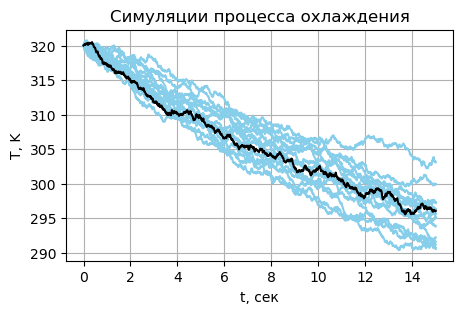

In [91]:
#params
r = mle_model.r #1/sec
sigma2 = mle_model.sigma2

#time stuff
finalTime = dd['time'][-1]
NSteps = int(finalTime / dd['delta'])
delta = dd['delta']

#number of simulations
NTrajs = 15

#temperatures
T0 = np.ones([NTrajs])*dd['temperature'][0] #K
Tenv = dd['Tenv'] #K

procModel = CoolingModel(mle_model.r, delta, math.sqrt(mle_model.sigma2))
trajs = procModel.simulate(T0, NSteps, Tenv)

ts = np.arange(0,finalTime+delta/2,delta) #+delta/2 to include the last value

f, ax = plt.subplots(figsize=(5,3))

ax.grid()
ax.set_title("Симуляции процесса охлаждения")
ax.set_xlabel("t, сек")
ax.set_ylabel("T, K")
ax.plot(ts,trajs.T, color='skyblue')
ax.plot(dd['time'], dd['temperature'], color='black')
plt.show()

ВАШ КОММЕНТАРИЙ ЗДЕСЬ.

## Задача 4. Дискретная модель цен (3 балла)

### Броуновское движение

[Броуновское движение (или по-другому Винеровский процесс)](https://en.wikipedia.org/wiki/Wiener_process)  - это случайный процесс (набор случайных величин) $\{W_t\}_{t \geq 0}$ c непрерывным временем, который задётся так:

* $W_0 = 0$

* $W_t - W_s \sim \mathcal{N}(0, t-s)$, $0 \leq s \leq t$

* $W_{t_2} - W_{t_1}$ и $W_{t_4} - W_{t_3}$  независимы для $0 \leq t_1 \leq t_2 \leq t_3 \leq t_4$

Мы можем попытаться нарисовать значения процесса в любом конечном наборе точек $(t_i)_{i=0}^{N_t}$, это будут зависимые случайные величины. Удобнее всего для симуляции пользоваться последним свойством: если обозначить $\Delta t_i = t_{i+1} - t_i$, то

$$
W_{t_{i+1}} = W_{t_i} + \varepsilon_{i+1},
$$

где $W_{t_0}$ задано, а шумы $\varepsilon_{i+1} \sim N(0, \Delta t_i)$ независимы.

### Симуляция

*Реализуйте симуляцию этого дискретизированного процесса $(W_{t_i})_{i=0}^{N_t}$, используя данную сетку по времени $(t_i)_{i=0}^{N_t}$.*

In [14]:
class BrownianMotion:

    def __init__(self):
        pass

    def sample(self, ts, Ntraj):
        """Returns a discrete set of observations

        Args:
            ts (float[]): time grid (T,)
            Ntraj (int): number of trajectories to sample
        Returns
            trajs (float[]): (Ntraj,T) samples
        """
        trajs = np.zeros([Ntraj,len(ts)])
        #YOUR CODE
        #trajs = ??
        for i in range(Ntraj):
            for j in range(1, len(ts)):
                trajs[i][j] = trajs[i][j - 1] + np.random.normal(0, ts[j] - ts[j - 1])
        return trajs

Проверим! Нарисуйте набор семплов наблюдений $W_{t_0},..,W_{t_{N_{t}}}$ из модели Броуновского движения при $t_0=0$ и $W_{t_0} = 0$.

In [15]:
#example
Ntraj = 50
T=3
Nt = 100#number of time subdivisions
delta = T/Nt
ts = np.arange(0,T+delta/2 ,delta)# discrete points from [0,T] 

bmProc = BrownianMotion()

trajs = bmProc.sample(ts,Ntraj)

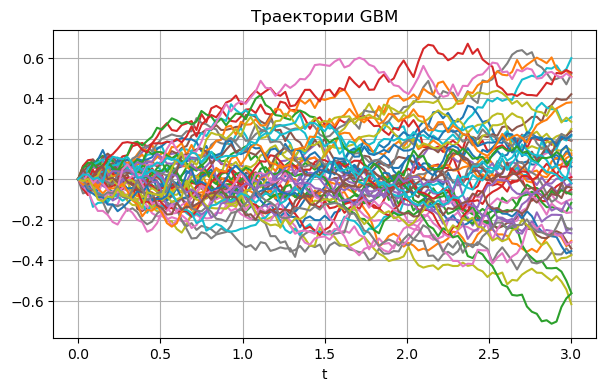

In [16]:
f, ax = plt.subplots(figsize=(7,4))

ax.grid()
ax.set_title("Траектории GBM")
ax.set_xlabel("t")
ax.plot(ts,trajs.T)
plt.show()

## Геометрическое Броуновское движение

Геометрическое Броуновское движение (GBM) -- это модель

$$
S_t = S_0 \exp[(\mu - \frac{\sigma^2}{2})t + \sigma W_t],
$$

где параметр $\mu$ называется сносом (он связан с безрисковой процентной ставкой на рынке и выплатами по активу, например, дивидендами акции), а $\sigma$ -- волатильностью. Это один из базовых кирпичиков моделей финансовых рядов.

Пусть мы пронаблюдали набор значений $S_{t_1},..,S_{t_N}$, давайте получим оценки параметров и попробуем оценить их по данным.


### Параметры

$
S_t = S_0 \exp[(\mu - \frac{\sigma^2}{2})t + \sigma W_t]
$

$
W_t - W_s \sim \mathcal{N}(0, t-s), 0 \leq s \leq t
$

$
W_{\Delta t} \sim \mathcal{N}(0, \Delta t), 0 \leq \Delta t
$

$$
\log S_{i} = \log S_0  + t_i(\mu - \frac{\sigma^2}{2}) + \sigma W_{t_i}
$$

$$
\Longrightarrow 
\log S_{i+1} - \log S_i = \Delta t_i (\mu - \frac{\sigma^2}{2}) + \sigma \sqrt{\Delta t_i} \epsilon_i,   \epsilon_i \sim \mathcal{N}(0, 1)
$$

$$
\sigma \epsilon_i = \frac{\log{\frac{S_{i+1}}{S_i}} - (\mu - \frac{\sigma^2}{2})\Delta t_i }{\sqrt{\Delta t_i}} \sim \mathcal{N}(0, \sigma^2)
$$

Будем оценивать параметеры $\mu$ и $\sigma^2$

### Правдоподобие

$$
\ln L
= C(n - 1) - {\frac{n - 1}{2} \log \sigma^2} - \frac{1}{2} \sum_{i=1}^{n-1}\frac{\left(\log{\frac{S_{i+1}}{S_i}} - (\mu - \frac{\sigma^2}{2})\Delta t_i\right)^2 }{\sigma^2{\Delta t_i}}
$$

### ММП-оценки

Дифференцируем по $\mu$:
$$
\frac{\partial}{\partial \mu} \ln L = - \frac{1}{2} \sum_{i=1}^{n-1}\frac{-2\Delta t_i\left(\log{\frac{S_{i+1}}{S_i}} - 
(\hat{\mu} - \frac{\hat{\sigma}^2}{2})\Delta t_i\right)}{\hat{\sigma}^2{\Delta t_i}} = 0
$$

$$
\hat{\mu} - \frac{\hat{\sigma}^2}{2} = 
\frac{1}{\sum_{i=0}^{n-1} \Delta t_i}
\sum_{i=1}^{n-1} \log \frac{S_{i+1}}{S_i} = 
\frac{\log \frac{S_n}{S_1}}{{\sum_{i=1}^{n-1} \Delta t_i}}
$$

$$
\Longrightarrow \hat{\mu} = \frac{\hat{\sigma}^2}{2} + \frac{\log \frac{S_n}{S_1}}{{\sum_{i=1}^{n-1} \Delta t_i}}
$$

Дифференцируем по $\sigma^2$:
$$
\frac{\partial}{\partial \sigma^2} \ln L = -\frac{n-1}{2\sigma^2} - \frac{1}{2} \sum_{i=1}^{n-1} (-1) \frac{\left( \log \frac{S_{i+1}}{S_i} - \Delta t_i (\mu - \hat{\sigma}^2 / 2) \right)^2}{\hat{\sigma}^4 \Delta t_i} - \frac{1}{2} \sum_{i=1}^{n-1} \frac{\Delta t_i \left( \log \frac{S_{i+1}}{S_i} - \Delta t_i (\mu - \hat{\sigma}^2 / 2) \right)}{\hat{\sigma}^2 \Delta t_i} = 0
$$

$$
\Longrightarrow \hat{\sigma}^2 = \frac{1}{n-1} \sum_{i=1}^{n-1} \frac{\left( \log \frac{S_{i+1}}{S_i} - \Delta t_i (\hat{\mu} - \frac{\hat{\sigma}^2}{2}) \right)^2}{\Delta t_i}
= \frac{1}{n-1} \sum_{i=1}^{n-1} \frac{\left( \log \frac{S_{i+1}}{S_i} - \Delta t_i (\frac{\log \frac{S_n}{S_1}}{{\sum_{i=1}^{n-1} \Delta t_i}}) \right)^2}{\Delta t_i}
$$

### Пишем модель

In [47]:
import math

class GBM:

    def __init__(self,mu,sigma):
        self.mu = mu 
        self.sigma = sigma
        self.brownMotion = BrownianMotion() 

    def sample(self, x0, ts):
        """Returns a discrete set of observations

        Args:
            x0 (float[]): set of initial conditions x_{ts[0]}  (Ntraj,)
            ts (float[]): time grid (T,)
        Returns
            trajs (float[]): (Ntraj,T) samples
        """
        Ntraj = len(x0)
        T = len(ts)
        trajs = np.zeros((Ntraj, T))
        
        for i in range(Ntraj):
            trajs[i, 0] = x0[i]
            
            for t in range(1, T):
                dt = ts[t] - ts[t-1]
                dz = np.random.normal(0, 1) 
                trajs[i, t] = trajs[i, t-1] * np.exp((self.mu - 0.5 * self.sigma**2) * dt + self.sigma * np.sqrt(dt) * dz)
        
        return trajs

    def fit(self, st, delta):
        """Fits the parameters given the data (assuming the step size is constant and equal delta)

        Args:
            st (float[]): observations (T,)
            delta (flaot): time step size
        """
        #YOUR ESTIMATION HERE
        #self.mu = ??   self.sigma = ??s
        
        n = len(st)
        sm = 0
        T = 0
        for i in range(n - 1):
            T += delta[i + 1] - delta[i]
        for i in range(n - 1):
            sm_up = (math.log(st[i + 1] / st[i]) - (delta[i + 1] - delta[i]) * (math.log(st[n - 1] / st[0]) / T)) ** 2
            sm += sm_up / (delta[i + 1] - delta[i])
        self.sigma = sm / (n - 1)
        
        self.mu = self.sigma / 2 + math.log(st[n - 1] / st[0]) / T
        
        self.sigma = math.sqrt(self.sigma)
        
        

Протестируем.

In [48]:
#example
Ntraj = 50
T=50
Nt = 5000#number of time subdivisions
delta = T/Nt
ts = np.arange(0,T+delta/2 ,delta)# discrete points from [0,T] 

mu=0.02
sigma=0.27
gbmProc = GBM(mu, sigma)

x0 = np.ones([Ntraj])*100
trajs = gbmProc.sample(x0,ts)

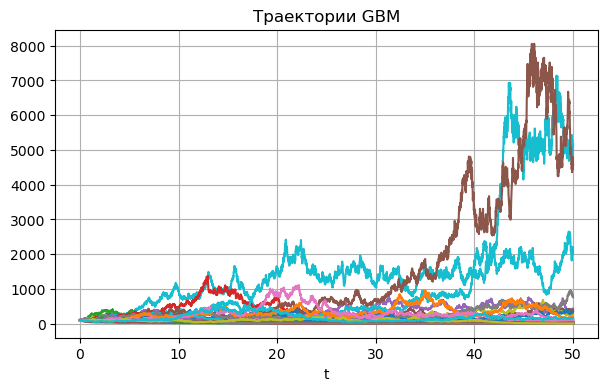

In [49]:
f, ax = plt.subplots(figsize=(7,4))

ax.grid()
ax.set_title("Траектории GBM")
ax.set_xlabel("t")
ax.plot(ts,trajs.T)
plt.show()

### Оценка модели по данным

Допишите метод `fit` в класс модели и оцените параметры, используя данный датасет, с помощью метода максимального правдоподобия.

In [50]:
# load data
with open("/Users/tanpeter/Desktop/Applied Statistics in ML/ASML_Homework/HW1/gbmData.pkl", "rb") as f:
    dd=pkl.load(f)
    #YOUR CODE
    #read the data
    print(dd)

{'value': array([ 100.        ,   98.28743029,  101.78640204, ..., 2541.54835436,
       2578.30327675, 2591.43485036]), 'time': array([0.000e+00, 1.000e-02, 2.000e-02, ..., 4.998e+01, 4.999e+01,
       5.000e+01])}


In [54]:
#random init
gbmProc = GBM(0.01, 0.01)
gbmProc.fit(dd['value'], dd['time'])

print('mu_MLE', gbmProc.mu)
print('sigma_MLE', gbmProc.sigma)

mu_MLE 0.08419912929329927
sigma_MLE 0.1954645392985611


Нарисуйте несколько траекторий оценённой модели более тонкими и прозрачными линиями и сравните с вашими данными.

In [55]:
import numpy as np
#example
Ntraj = 20
T=50
Nt = 5000
delta = T/Nt
ts = np.arange(0,T+delta/2 ,delta)

mu=0.02
sigma=0.27
gbmProc = GBM(gbmProc.mu, gbmProc.sigma)

x0 = np.ones([Ntraj])*100
trajs = gbmProc.sample(x0,ts)

### Модель с ММП

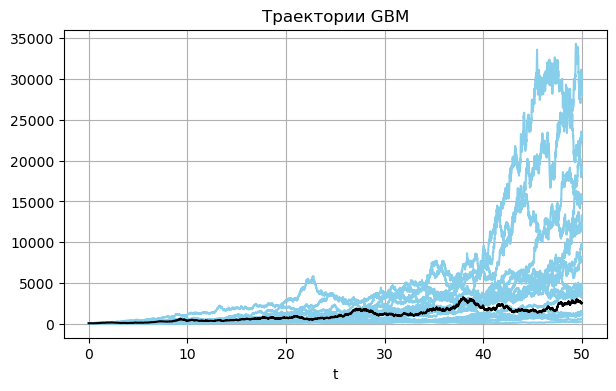

In [57]:
f, ax = plt.subplots(figsize=(7,4))

ax.grid()
ax.set_title("Траектории GBM")
ax.set_xlabel("t")
ax.plot(ts, trajs.T, color='skyblue')
ax.plot(dd['time'],dd['value'], color='black')
plt.show()

Видно, что почти все ок, но со временем из-за шума становится плохо.